# Análisis de Probabilidad y Visualización

En este notebook, realizaremos un análisis de probabilidades utilizando los datos de una encuesta. Usaremos librerías avanzadas para cálculos y gráficos:
- **pandas**: Para manipulación de datos.
- **NumPy**: Para cálculos numéricos y probabilidades.
- **matplotlib** y **seaborn**: Para gráficos atractivos.

## Objetivos:
1. Calcular probabilidades marginales, condicionales y conjuntas.
2. Verificar independencia entre eventos.
3. Representar visualmente los resultados de manera clara y profesional.

---


In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Cargar los datos
file_path = "Respuestas.xlsx"  # Ruta del archivo
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")




## 2. Probabilidad Marginal

Calcularemos la probabilidad marginal de eventos simples, como el conocimiento avanzado en Blockchain.


Probabilidades marginales en Blockchain:
Nivel 'Avanzado': 0.03
Nivel 'Básico': 0.30
Nivel 'Intermedio': 0.07
Nivel 'Ninguno': 0.60


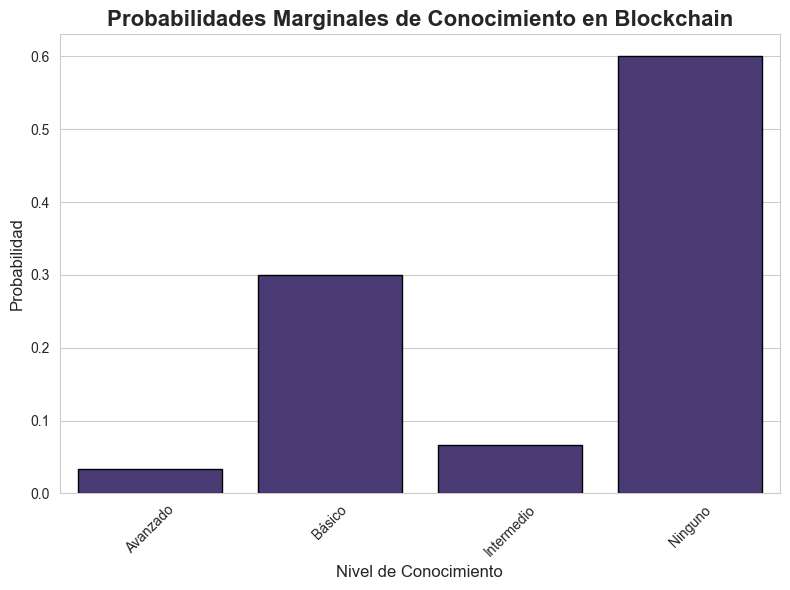

In [4]:
# Convertir la columna a un arreglo NumPy
blockchain_levels = df['¿Cuál es tu nivel de conocimiento sobre Blockchain? '].to_numpy()

# Calcular probabilidades de cada nivel
unique, counts = np.unique(blockchain_levels, return_counts=True)
probabilities = counts / len(blockchain_levels)

# Mostrar resultados
print("Probabilidades marginales en Blockchain:")
for level, prob in zip(unique, probabilities):
    print(f"Nivel '{level}': {prob:.2f}")

# Gráfico de barras para probabilidades marginales
plt.figure(figsize=(8, 6))
sns.barplot(x=unique, y=probabilities, edgecolor='black')
plt.title("Probabilidades Marginales de Conocimiento en Blockchain", fontsize=16, weight='bold')
plt.xlabel("Nivel de Conocimiento", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Probabilidad Condicional 

Calculamos **P(Conocimiento intermedio en IA | Conocimiento intermedio en ML):**  
Dado que alguien tiene conocimiento intermedio en ML, ¿qué tan probable es que también lo tenga en IA?


In [5]:
# Crear arreglos booleanos para nivel intermedio
ml_intermedio = df['¿Cuál es tu nivel de conocimiento sobre Machine Learning (ML)? '].to_numpy() == 'Intermedio'
ia_intermedio = df['¿Cuál es tu nivel de conocimiento sobre Inteligencia Artificial (IA)? '].to_numpy() == 'Intermedio'

# Calcular probabilidad condicional
if np.sum(ml_intermedio) > 0:
    p_ia_given_ml = np.sum(ml_intermedio & ia_intermedio) / np.sum(ml_intermedio)
    print(f"Probabilidad de IA intermedio dado ML intermedio: {p_ia_given_ml:.2f}")
else:
    print("No hay participantes con conocimiento intermedio en ML.")


Probabilidad de IA intermedio dado ML intermedio: 0.71


## 4. Probabilidad Conjunta

Evaluamos la probabilidad de que dos eventos ocurran simultáneamente, como:

- **P(Conocimiento avanzado en Blockchain ∩ Cree que es útil):**
  La probabilidad de que alguien tenga conocimiento avanzado en Blockchain **y** considere que es útil para la ciberseguridad.


In [6]:
# Crear arreglos booleanos
blockchain_advanced = df['¿Cuál es tu nivel de conocimiento sobre Blockchain? '].to_numpy() == 'Avanzado'
blockchain_useful = df['¿Consideras que el Blockchain es una tecnología útil para la ciberseguridad? '].to_numpy() == 'Sí'

# Calcular probabilidad conjunta
p_joint = np.sum(blockchain_advanced & blockchain_useful) / len(df)
print(f"Probabilidad conjunta (Blockchain avanzado y útil): {p_joint:.2f}")


Probabilidad conjunta (Blockchain avanzado y útil): 0.03


## 5. Verificar Independencia de Eventos

Para verificar si dos eventos son independientes, usamos:

- \( P(A \cap B) = P(A) \cdot P(B) \)


In [7]:
# Probabilidades marginales
p_advanced_blockchain = np.sum(blockchain_advanced) / len(df)
p_useful = np.sum(blockchain_useful) / len(df)

# Comparar con la probabilidad conjunta
is_independent = np.isclose(p_joint, p_advanced_blockchain * p_useful)

# Resultados
print(f"¿Son independientes los eventos? {'Sí' if is_independent else 'No'}")


¿Son independientes los eventos? No


## 6. Conclusiones Visualizadas

Generamos un gráfico que combine probabilidades conjuntas y marginales para resumir los resultados.


C:\Users\Irvinng\AppData\Local\Temp\ipykernel_22636\2079531310.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=probs, edgecolor='black', palette='viridis')


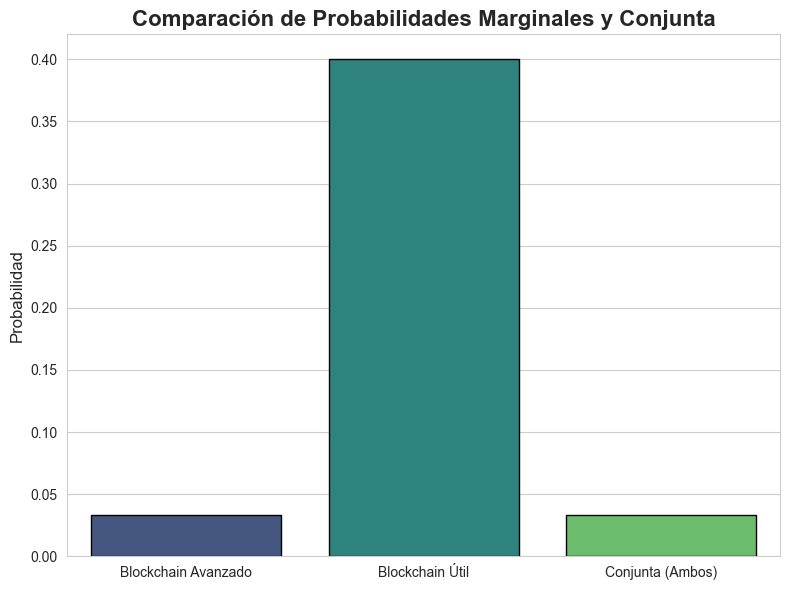

In [8]:
# Datos para el gráfico
labels = ['Blockchain Avanzado', 'Blockchain Útil', 'Conjunta (Ambos)']
probs = [p_advanced_blockchain, p_useful, p_joint]

# Gráfico de barras comparativo
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=probs, edgecolor='black', palette='viridis')
plt.title("Comparación de Probabilidades Marginales y Conjunta", fontsize=16, weight='bold')
plt.ylabel("Probabilidad", fontsize=12)
plt.tight_layout()
plt.show()


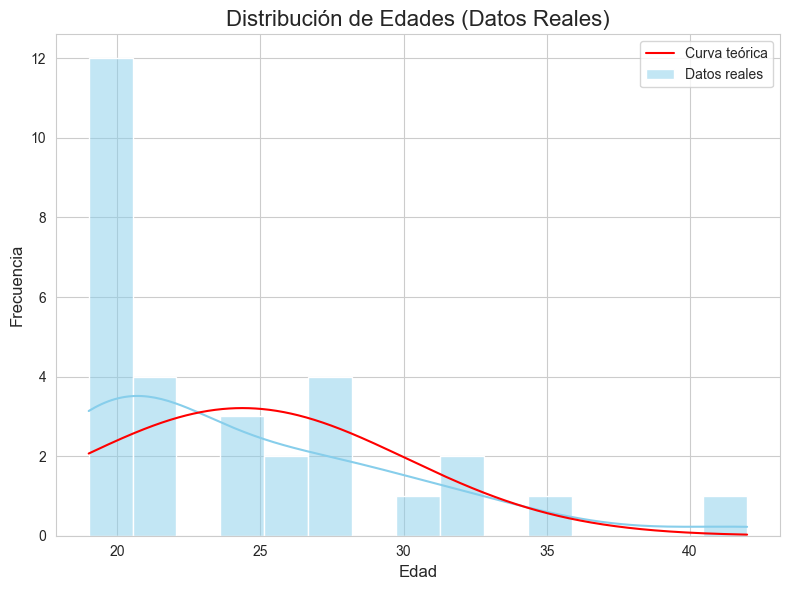

In [13]:
# Usar los datos reales de la columna 'Edad'
ages = df['Edad']

# Calcular media y desviación estándar de la columna
mean_age = ages.mean()
std_age = ages.std()

# Histograma de los datos reales
plt.figure(figsize=(8, 6))
sns.histplot(ages, kde=True, bins=15, color='skyblue', label='Datos reales')

# Superponer la curva normal basada en la media y desviación estándar de los datos reales
x = np.linspace(min(ages), max(ages), 1000)
plt.plot(x, norm.pdf(x, mean_age, std_age) * len(ages) * (max(ages) - min(ages)) / 15, color='red', label='Curva teórica')
plt.title("Distribución de Edades (Datos Reales)", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# Seleccionar la columna 'Edad' como población
population = df['Edad'].to_numpy()

# Configurar el tamaño de la muestra y el intervalo
sample_size = 10
k = len(population) // sample_size

# Selección sistemática
start = np.random.randint(0, k)  # Inicio aleatorio
systematic_sample = population[start::k][:sample_size]

print("Muestra Sistemática de Edades:", systematic_sample)


Muestra Sistemática de Edades: [20 31 20 26 28 19 42 28 32 19]


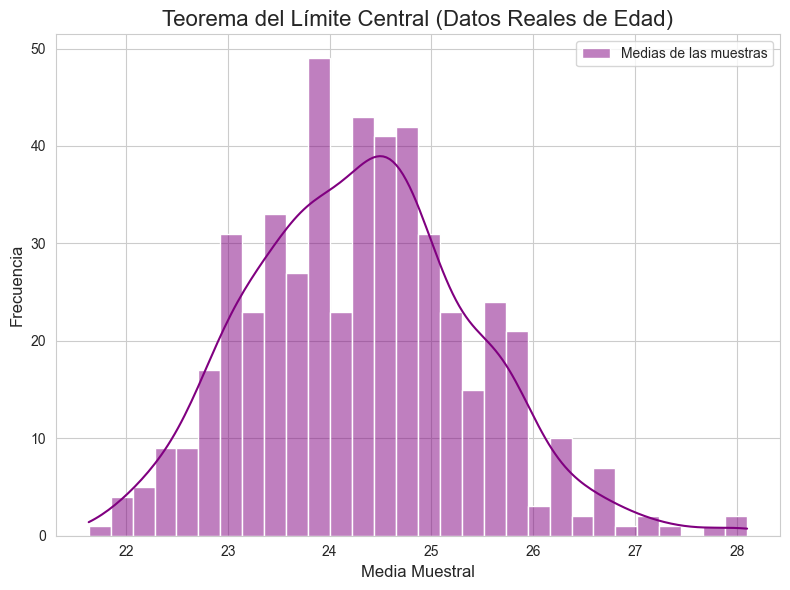

In [16]:
# Generar muestras repetidas de la columna 'Edad'
sample_size = 30
num_samples = 500
population = df['Edad'].to_numpy()

# Calcular medias muestrales
sample_means = [np.mean(np.random.choice(population, sample_size, replace=True)) for _ in range(num_samples)]

# Gráfico
plt.figure(figsize=(8, 6))
sns.histplot(sample_means, kde=True, bins=30, color='purple', label='Medias de las muestras')
plt.title("Teorema del Límite Central (Datos Reales de Edad)", fontsize=16)
plt.xlabel("Media Muestral", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
